In [1]:
from Metaheuristicas.fitness_functions import *


In [2]:
X, y = load_and_preprocess_data(filename='Resources/SeisBenchV1_v1_1.json')


In [3]:
import pandas as pd
from IPython.display import display, clear_output

# Step 1: Initialize empty DataFrames for each classifier with metrics as columns
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

naive_bayes_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
random_forest_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
neural_network_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])

# Display all tables function
def display_tables():
    clear_output(wait=True)
    print("Naive Bayes Results")
    display(naive_bayes_df)
    print("Random Forest Results")
    display(random_forest_df)
    print("Neural Network Results")
    display(neural_network_df)

In [4]:
def add_result(classifier, fitness_function, accuracy, precision, recall, f1_score, auc):
    new_data = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
        "AUC": auc
    }

    if classifier == "Naive Bayes":
        global naive_bayes_df
        naive_bayes_df.loc[fitness_function] = new_data
    elif classifier == "Random Forest":
        global random_forest_df
        random_forest_df.loc[fitness_function] = new_data
    elif classifier == "Neural Network":
        global neural_network_df
        neural_network_df.loc[fitness_function] = new_data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def confusion_matrix_heatmap(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [6]:
from Metaheuristicas.Cuckoo import cuckoo_search

n = 40
dim = 84
itermax = 300

In [7]:
#Save the results from the optimizations
Mutual_Information = []
Chi2 = []
ReliefF = []

#### Models Naive Bayes and Decision Tree

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
DT = RandomForestClassifier()

#dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Cuckoo Search with Mutual Information


In [9]:
#TODO: checar parametros
nests, fitness_scores, best_nest, best_CKMIfitness = cuckoo_search(n, dim, 130, X, y, fitness_function=mutual_information_eval)

CKMIFeatures = X.columns[best_nest.astype(bool)].tolist()
Mutual_Information.append([CKMIFeatures, best_CKMIfitness])


In [10]:
NB.fit(X_train[CKMIFeatures], y_train)

y_pred = NB.predict(X_test[CKMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))


Accuracy: 0.9302325581395349
Precision: 0.48717948717948717
Recall: 0.8260869565217391
F1: 0.6129032258064516
AUC: 0.8818908302857917


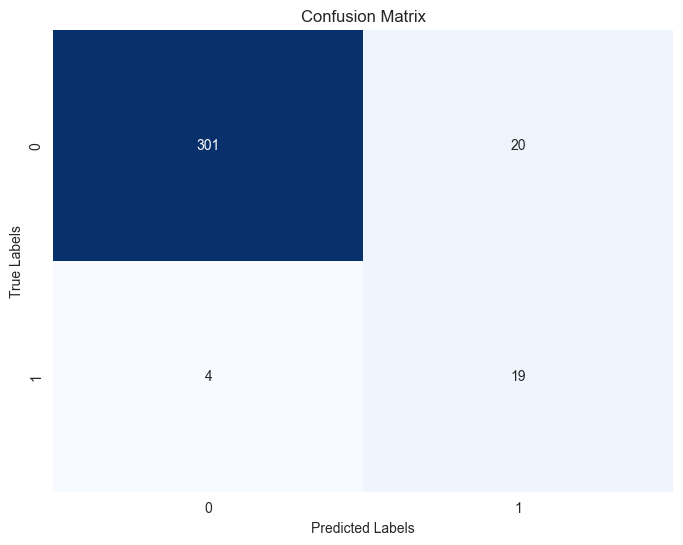

In [11]:
confusion_matrix_heatmap(y_test, y_pred)


In [12]:
DT.fit(X_train[CKMIFeatures], y_train)

y_pred = DT.predict(X_test[CKMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9680232558139535
Precision: 0.8
Recall: 0.6956521739130435
F1: 0.7441860465116279
AUC: 0.8415955573615062


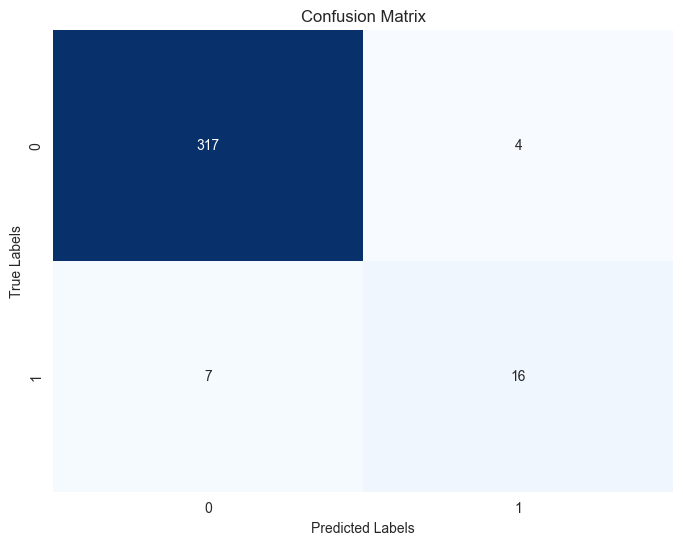

In [13]:
confusion_matrix_heatmap(y_test, y_pred)

# Cuckoo Search with Chi2

In [14]:
nests, fitness_scores, best_nest, best_CKX2fitness = cuckoo_search(n, dim, itermax, X, y, fitness_function= chi2_eval)
CKX2Features = X.columns[best_nest.astype(bool)].tolist()
Chi2.append([CKX2Features, best_CKX2fitness])


In [15]:
NB.fit(X_train[CKX2Features], y_train)
y_pred = NB.predict(X_test[CKX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9563953488372093
Precision: 0.6428571428571429
Recall: 0.782608695652174
F1: 0.7058823529411765
AUC: 0.875728023838548


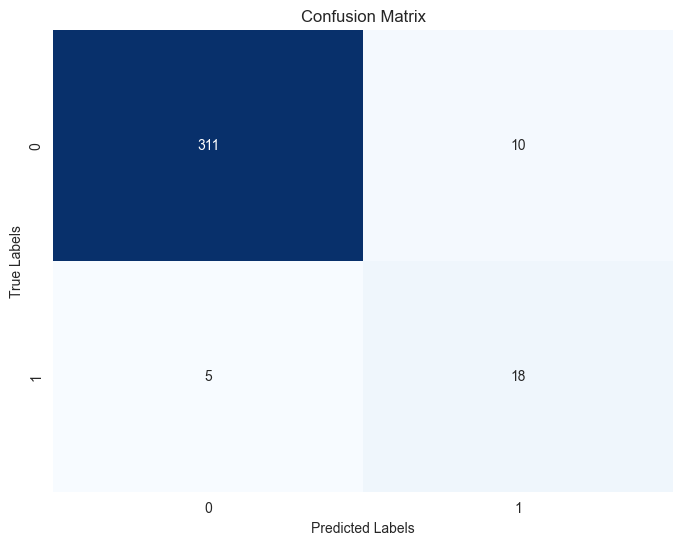

In [16]:
confusion_matrix_heatmap(y_test, y_pred)

In [17]:
DT.fit(X_train[CKX2Features], y_train)
y_pred = DT.predict(X_test[CKX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9680232558139535
Precision: 0.8333333333333334
Recall: 0.6521739130434783
F1: 0.7317073170731708
AUC: 0.8214140593254774


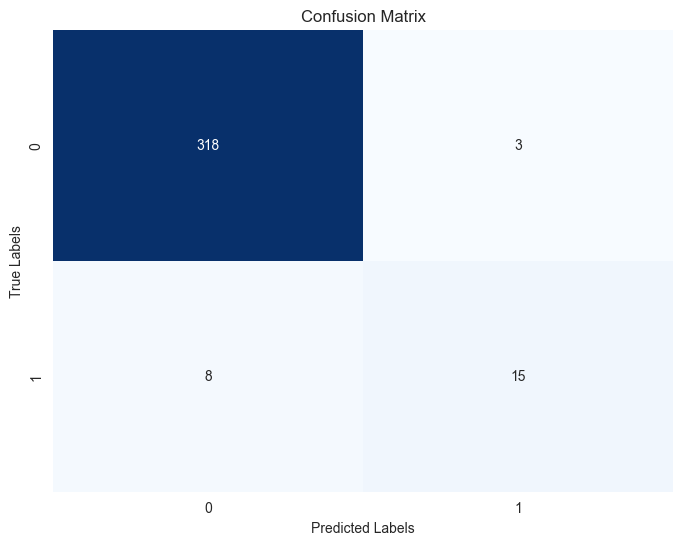

In [18]:
confusion_matrix_heatmap(y_test, y_pred)

# Cuckoo Search with ReliefF

In [19]:
nests, fitness_scores, best_nest, bestRFfitness = cuckoo_search(n, dim, itermax, X, y, fitness_function= relieff_eval)
RFFeatures = X.columns[best_nest.astype(bool)].tolist()
ReliefF.append([RFFeatures, bestRFfitness])

In [20]:
NB.fit(X_train[RFFeatures], y_train)
y_pred = NB.predict(X_test[RFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9476744186046512
Precision: 0.5862068965517241
Recall: 0.7391304347826086
F1: 0.6538461538461539
AUC: 0.8508736286062576


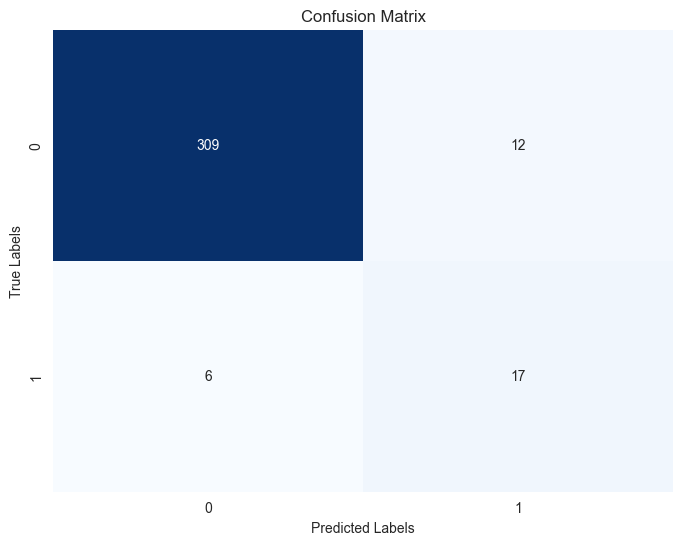

In [21]:
confusion_matrix_heatmap(y_test, y_pred)

In [22]:
DT.fit(X_train[RFFeatures], y_train)
y_pred = DT.predict(X_test[RFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9651162790697675
Precision: 0.8235294117647058
Recall: 0.6086956521739131
F1: 0.7
AUC: 0.7996749288906949


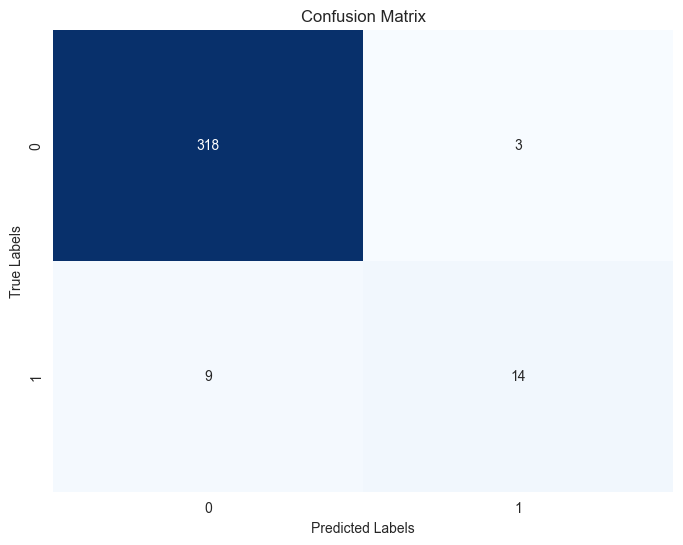

In [23]:
confusion_matrix_heatmap(y_test, y_pred)

## Red Neuronal


In [24]:
print("Features selected by MI: ", len(CKMIFeatures))
print("Features selected by X2: ", len(CKX2Features))
print("Features selected by ReliefF: ", len(RFFeatures))

Features selected by MI:  56
Features selected by X2:  21
Features selected by ReliefF:  23


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

MUTUAL_INFORMATION 

In [26]:


# Crear y compilar el modelo
RN = Sequential()

# Definir la dimensión de entrada basada en las características seleccionadas
input_dim = X_train[CKMIFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
RN.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Entrenar el modelo
history = RN.fit(X_train[CKMIFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = RN.evaluate(X_test[CKMIFeatures], y_test)

print(f'Test Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
y_pred_prob = RN.predict(X_test[CKMIFeatures])  # Predicciones como probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas (0 o 1)

# Calcular y mostrar las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))  # Usamos probabilidades para AUC
add_result("Neural Network", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))


Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 0s 7ms/step - loss: 0.4280 - accuracy: 0.8781 - val_loss: 0.2773 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8984 - val_loss: 0.2342 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9031 - val_loss: 0.1906 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9219 - val_loss: 0.1488 - val_accuracy: 0.9379
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9516 - val_loss: 0.1242 - val_accuracy: 0.9317
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1056 - accuracy: 0.9609 - val_loss: 0.1210 - val_accuracy: 0.9317
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9656 - val_loss: 0.1023 - val_accuracy: 0.9503
Epoch 8/100
20/20 [======

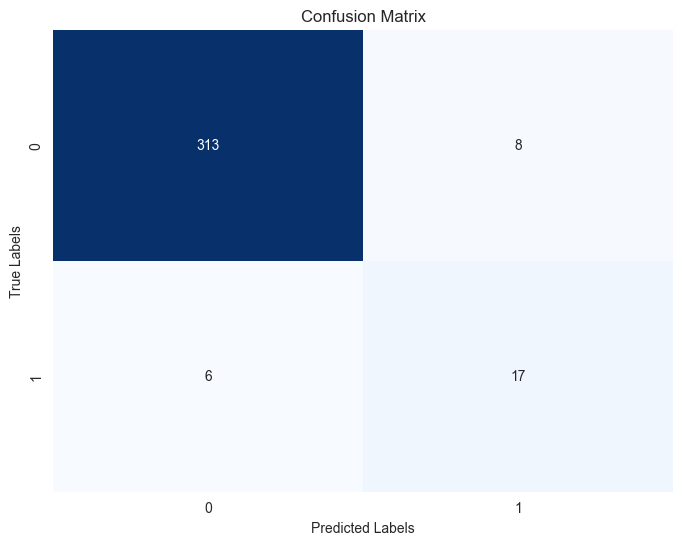

In [27]:
confusion_matrix_heatmap(y_test, y_pred)

CHI2

In [31]:

RN = Sequential()

input_dim = X_train[CKX2Features].shape[1] 
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

history = RN.fit(X_train[CKX2Features], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[CKX2Features], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[CKX2Features]) 
y_pred = (y_pred_prob > 0.5).astype(int)  

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob)) 
add_result("Neural Network", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))


Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 0s 5ms/step - loss: 0.6008 - accuracy: 0.7531 - val_loss: 0.4526 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8984 - val_loss: 0.2909 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.8984 - val_loss: 0.2430 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9016 - val_loss: 0.2066 - val_accuracy: 0.9193
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9203 - val_loss: 0.1697 - val_accuracy: 0.9317
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9438 - val_loss: 0.1395 - val_accuracy: 0.9441
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9453 - val_loss: 0.1194 - val_accuracy: 0.9503
Epoch 8/100
20/20 [======

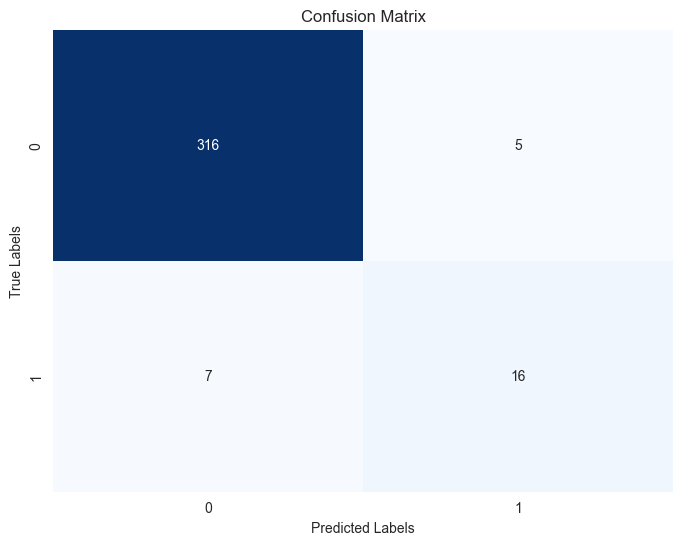

In [32]:
confusion_matrix_heatmap(y_test, y_pred)

RELIEFF

In [33]:
RN = Sequential()

input_dim = X_train[RFFeatures].shape[1] 
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

history = RN.fit(X_train[RFFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[RFFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[RFFeatures]) 
y_pred = (y_pred_prob > 0.5).astype(int)  

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob)) 
add_result("Neural Network", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 0s 6ms/step - loss: 0.5253 - accuracy: 0.8891 - val_loss: 0.3919 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8984 - val_loss: 0.2702 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8984 - val_loss: 0.2485 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8984 - val_loss: 0.2294 - val_accuracy: 0.9193
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9000 - val_loss: 0.2031 - val_accuracy: 0.9193
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9187 - val_loss: 0.1808 - val_accuracy: 0.9255
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9375 - val_loss: 0.1606 - val_accuracy: 0.9317
Epoch 8/100
20/20 [======

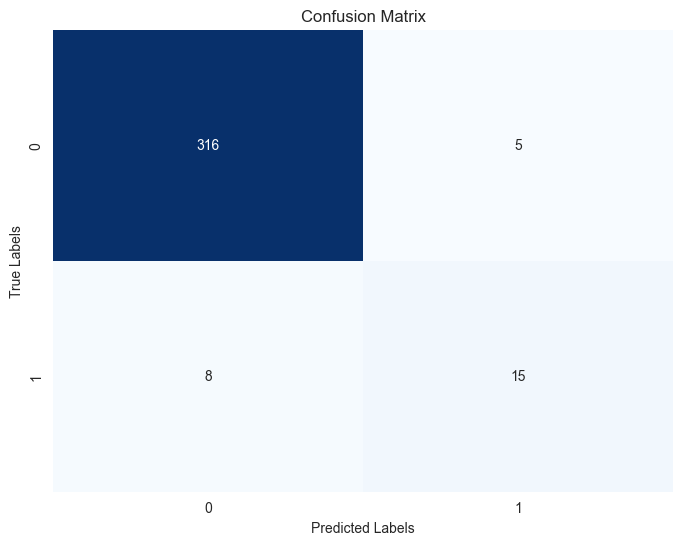

In [34]:
confusion_matrix_heatmap(y_test, y_pred)

In [35]:
display_tables()

,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.930233,0.487179,0.826087,0.612903,0.881891
X2,0.956395,0.642857,0.782609,0.705882,0.875728
Relief,0.947674,0.586207,0.73913,0.653846,0.850874


Random Forest Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.968023,0.8,0.695652,0.744186,0.841596
X2,0.968023,0.833333,0.652174,0.731707,0.821414
Relief,0.965116,0.823529,0.608696,0.7,0.799675


Neural Network Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.959302,0.68,0.73913,0.708333,0.977516
X2,0.965116,0.761905,0.695652,0.727273,0.984017
Relief,0.962209,0.75,0.652174,0.697674,0.964649
